# Training a Neural Network From Scratch

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#To generate a random  floating data 
rg = np.random.default_rng()
bias = 0.5
l_rate = 0.1
epoch = 10
epoch_loss = []

In [11]:
# Generating data's function
def generate_data(n_features, n_values):
    # To create a random feature consist of n_features and n_values
    features = rg.random((n_features, n_values))
    # Generating a random weights of 1 dimension and [0] to get ride of 2 []
    weights = rg.random((1, n_values))[0]
    # To create a random targets which will be 0 or 1
    targets = np.random.choice([0,1], n_features)
    data = pd.DataFrame(features, columns=["x0","x1","x2"])
    data["targets"] = targets
    return data, weights
    
data, weights = generate_data(4,3)  
print(data)

         x0        x1        x2  targets
0  0.921875  0.187103  0.371777        1
1  0.513988  0.790940  0.840505        1
2  0.765861  0.054464  0.607227        1
3  0.454335  0.932093  0.478474        1


In [13]:
# Weighted sum's function 
def get_weighted_sum(feature, weights , bias):
    return np.dot(feature , weights) + bias


In [15]:
# The Sigmod's function
def sigmod(w_sum):
    return 1/ (1 + np.exp(-w_sum))

In [17]:
# Cross Entrepy loss
def cross_enteropy(target , prediction):
    return -(target * np.log10(prediction) + (1 - target) * np.log10(1 - prediction))

In [19]:
# Lets's start with Gradient Descent
# Updating the weights
def update_weights(weights , l_rate, target, prediction, feature):
    new_weights = []
    for x,w in zip(feature, weights):
        new_w = w + l_rate * (target - prediction)* x
        new_weights.append(new_w)
    return (new_weights)


# Updating the bias
def update_bias(bias , l_rate , target , prediction):
    return  bias  + l_rate* (target - prediction)

In [21]:
# Let's train our model
def train_model(data , weights, bias, l_rate , epochs):
    for e in range(epoch):
        individual_loss = []
    
        for i in range(len(data)):
            # we add [:-1] to remove the target column (the last one)
            feature = data.iloc[i,:-1]
            target = data.iloc[i,-1]
            w_sum = get_weighted_sum(feature, weights , bias)
            prediction = sigmod(w_sum)
            loss = cross_enteropy(target , prediction)
            individual_loss.append(loss)
            #print(loss)
           # print(w_sum)
           # print(sigmod(w_sum))
            #print("OLD VALUES")
            #print(weights,bias)
            # Gradient descent 
            weights = update_weights(weights , l_rate, target, prediction, feature)
            bias = update_bias(bias , l_rate , target , prediction)
            #print("NEW VALUES")
            #print(weights,bias)
    
        average_loss = sum(individual_loss)/len(individual_loss)
        epoch_loss.append(average_loss)
        print("*****************************************")
        print("EPOCH" , e)
        print(average_loss)

In [23]:
train_model(data , weights, bias, l_rate , epoch)

*****************************************
EPOCH 0
0.09728417419015241
*****************************************
EPOCH 1
0.08477322214362032
*****************************************
EPOCH 2
0.07492419591171948
*****************************************
EPOCH 3
0.06700339326470252
*****************************************
EPOCH 4
0.060515518540305326
*****************************************
EPOCH 5
0.05511676319644871
*****************************************
EPOCH 6
0.05056237972151872
*****************************************
EPOCH 7
0.0466741543934503
*****************************************
EPOCH 8
0.043319667875225086
*****************************************
EPOCH 9
0.04039872929365034


<Axes: title={'center': 'average loss'}>

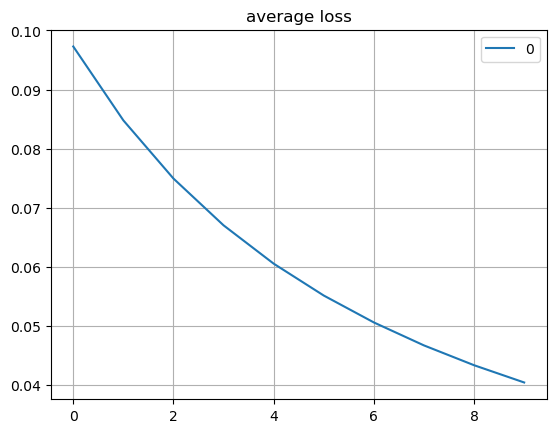

In [27]:
# Visualize the average loss
df = pd.DataFrame(epoch_loss)
df_plot = df.plot(kind="line", grid=True , title="average loss")
df_plot